# Relatório - Trabalho 2 - Cálculo Numérico

## Objetivo
Dado o problema no enunciado do trabalho, devemos obter uma função phi(x) que aproxime ao máximo a função f(x), dada por um conjunto discreto de pontos.

O ajuste por método dos mínimos quadrados consiste, neste problema, em achar as constantes $a,b,c,d$ e $e$ de maneira que $phi(x) = ag_1(x) + bg_2(x) +cg_3(x) + dg_4(x) + eg_5(x)$ se aproxime o máximo possível de $f(x)$

Como pedido no enunciado iremos realizar um ajuste polinomial de quarto grau, ou seja:
- $g_1(x) = x^4$
- $g_2(x) = x^3$
- $g_3(x) = x^2$
- $g_4(x) = x$
- $g_5(x) = 1$

## Metodologia

Dado um conjunto de pontos de tamanho **m**, devemos montar e resolver o sistema linear $Ax=b$, onde $x$ é o vetor de coeficientes das funções $g_k(x)$ para todo $k$:

$A_{k,k} =
 \begin{pmatrix}
  a_{1,1}*x_1 & a_{1,2}*x_2 & \cdots & a_{1,k}*x_k \\
  a_{2,1}*x_1 & a_{2,2}*x_2 & \cdots & a_{2,k}*x_k \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{k,1}*x_1 & a_{k,2}*x_2 & \cdots & a_{k,k}*x_k
 \end{pmatrix}$

 onde $a_{i,j} = a_{j,i} = \sum_{k=1}^{m}g_j(x_k)*g_i(x_k)$

e $b_i = \sum_{k=1}^{m}f(x_k)*g_i(x_k)$




Coeficientes gerados pelo NumPy:
 [-2.16733917  6.9584971  -7.50194721  2.93391794 -0.06343363]

Coeficientes gerados pelo sistema criado:
 [[-2.16733917]
 [ 6.9584971 ]
 [-7.50194721]
 [ 2.93391794]
 [-0.06343363]]



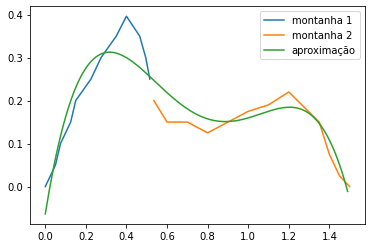

In [1]:
import numpy as np
import matplotlib.pyplot as mpl

# conjunto de pontos da primeira montanha
x1 = np.array([0, 0.05, 0.075, 0.125, 0.15, 0.225, 0.275, 0.35, 0.4, 0.465, 0.495, 0.5150])
y1 = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.396, 0.35, 0.3, 0.25]) 

# conjunto de pontos da segunda montanha
x2 = np.array([0.535, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.35, 1.4, 1.45, 1.5])
y2 = np.array([0.2, 0.15, 0.15, 0.125, 0.15, 0.175, 0.19, 0.22, 0.15, 0.075, 0.025, 0])

# diagrama de dispersões
mpl.plot(x1,y1,label='montanha 1')
mpl.plot(x2,y2,label='montanha 2')

# conjunto de pontos total
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

# funções g(x) que definem phi(x)
def g(x, index):
  if index==1: return pow(x,4)
  elif index==2: return pow(x,3)
  elif index==3: return pow(x,2)
  elif index==4: return x
  elif index==5: return 1

# montando matriz A
A = np.zeros([5,5])
for i in range(1,6):
  for j in range(1,6):
    v = 0
    for k in range(len(x)):
      v += g(x[k],j)*g(x[k],i) 
    A[i-1][j-1] = v

# montando vetor b
b = np.zeros([5,1])
for i in range(1,6):
  v = 0
  for j in range(len(x)):
    v += y[j]*g(x[j],i)
  b[i-1] = v

# resolvendo o sistema Ax=b
r = np.linalg.solve(A,b)

# comparando resultados com solver do numpy
print("Coeficientes gerados pelo NumPy:\n", np.polyfit(x, y, 4), end='\n\n')
print("Coeficientes gerados pelo sistema criado:\n", r, end='\n\n')

# plotando resultados
t = np.arange(0.0, 1.5, 0.01)
s = r[0][0]*g(t,1) + r[1][0]*g(t,2) + r[2][0]*g(t,3) + r[3][0]*g(t,4) + r[4][0]
mpl.plot(t,s,label='aproximação')
mpl.legend(loc="upper right")
mpl.show()
